
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**


---


Integrantes:
*   Candelaria Arpajou: mcarpajou@santafe-conicet.gov.ar
*   Hugo Folonier: hugofolonier@gmail.com
*   Gustavo Jaca: gustavojaca@gmail.com

**Edición 2022**

---
## Trabajo práctico entregable - Parte 2

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [101]:
url = "https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv"
dataset = pd.read_csv(url, comment="#")

In [102]:
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [103]:
X_train.shape,X_test.shape

((1483, 10), (371, 10))

In [104]:
y_train.shape, y_test.shape

((1483,), (371,))


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

**1. ¿De qué se trata el conjunto de datos?**

Se trata de una base de datos de créditos hipotecarios otorgados por un banco, para la cual se ha incluido una etiqueta "resultado" que indica si el cliente o beneficiario del crédito incumplió con el pago o tuvo algún tipo de irregularidad. Se busca, a partir de estos datos ya categorizados, poder encontrar un patrón que permita identificar estadísticamente un potencial riesgo de mora al entregar un crédito hipotecario.

**2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?**

La variable objetivo es el primer campo *TARGET*. Es una variable binaria que indica en los casos positivos (True) aquellos en los que el cliente en algún momento dejó de pagar el crédito, y en los negativos (False) aquellos clientes que siempre pagaron.

**3. ¿Qué información (atributos) hay disponible para hacer la predicción?**

Hay 10 variables numéricas, que indican atributos del préstamo (valor neto, valor adeudado sobre el monto total del crédito, porcentaje respecto al valor de la propiedad), otros indican un score crediticio del tomador y otros hablan de la capacidad de pago y la antiguedad laboral de la persona.

**4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?**

Estimamos, sin ver los datos, que el scoring crediticio debería ayudar mucho en la predicción, así como el ratio de la deuda sobre los ingresos (como variable que refleje la capacidad de pago).

In [105]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


In [106]:
dataset.TARGET.value_counts()

0    1545
1     309
Name: TARGET, dtype: int64

Se ve que inicialmente las clases están desbalanceadas

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

#### Resolución EJERCICIO 2.1

In [107]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV,cross_val_predict

En primer instancia, se arma un pipeline que incluye StandardScaler para el escalado de los datos y SGDClassifier como modelo clasificador. Inicialmente, solo se fija la semilla. 

In [108]:
SGD_model = Pipeline([['scaler',StandardScaler()],['SGD_class', SGDClassifier(random_state = 1234)]])
SGD_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ['SGD_class', SGDClassifier(random_state=1234)]])

Una vez entrenado el modelo, se procede a evaluar las métricas en el conjunto de entrenamiento y testeo.

In [109]:
# Predicción en el conjunto de entrenamiento
y_pred_train = SGD_model.predict(X_train)

In [110]:
print(f'Accuracy - TRAIN: {accuracy_score(y_train,y_pred_train):.03}')
print(f'Precision - TRAIN: {precision_score(y_train,y_pred_train):.03}')
print(f'Recall - TRAIN: {recall_score(y_train,y_pred_train):.03}')
print(f'F1 - TRAIN: {f1_score(y_train,y_pred_train):.03}')
print('Matriz de confusión - TRAIN:')
cm = confusion_matrix(y_train.ravel(),y_pred_train)
print(f'{cm}')

Accuracy - TRAIN: 0.856
Precision - TRAIN: 0.69
Recall - TRAIN: 0.275
F1 - TRAIN: 0.393
Matriz de confusión - TRAIN:
[[1201   31]
 [ 182   69]]


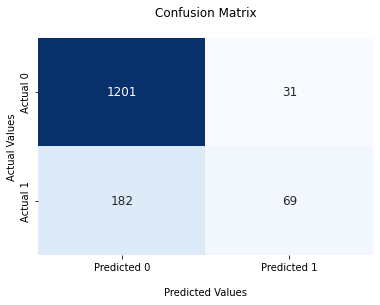

In [111]:
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={'fontsize': 12}, cmap='Blues',cbar=False)
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['Predicted 0','Predicted 1'])
ax.yaxis.set_ticklabels(['Actual 0', 'Actual 1'])

plt.show()

In [112]:
# Predicción en conjuntode testeo
y_pred = SGD_model.predict(X_test)

In [113]:
print(f'Accuracy - TEST: {accuracy_score(y_test,y_pred):.03}')
print(f'Precision - TEST: {precision_score(y_test,y_pred):.03}')
print(f'Recall - TEST: {recall_score(y_test,y_pred):.03}')
print(f'F1 - TEST: {f1_score(y_test,y_pred):.03}')
print('Matriz de confusión - TEST:')
cm_test = confusion_matrix(y_test.ravel(),y_pred)
print(f'{cm_test}')

Accuracy - TEST: 0.86
Precision - TEST: 0.625
Recall - TEST: 0.259
F1 - TEST: 0.366
Matriz de confusión - TEST:
[[304   9]
 [ 43  15]]


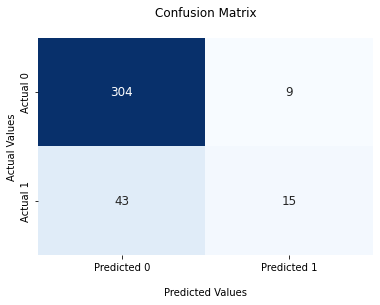

In [114]:
ax = sns.heatmap(cm_test, annot=True, fmt='d', annot_kws={'fontsize': 12}, cmap='Blues',cbar=False)
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['Predicted 0','Predicted 1'])
ax.yaxis.set_ticklabels(['Actual 0', 'Actual 1'])

plt.show()

**Conclusión**

Del análisis de las métricas en el conjunto de testeo se desprende que, si bien el modelo presenta un accuracy elevado, no es muy eficiente debido a que las demás métricas no poseen valores superiores al 65%. En otras palabras, si bien son correctas el 86% de las predicciones totales (acuracy = 86%), a la hora de identificar los casos positivos (clientes que dejarán de pagar el préstamo) el modelo solo acierta el 63% de las veces (precision = 63%), y para los casos negativos (clientes que siempre pagarán el préstamo), solo el 26% (recall = 26%). Por otro lado, el F1-score es bastante bajo (F1 = 37%), lo que es otro indicio de que el modelo no predice correctamente. 
Una posible razón de esto podría deberse a que las clases se encuentran desbalanceadas.

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#### Resolución EJERCICIO 2.2

Se construye el modelo con GridSearchCV para evaluar el rendimiento de los diferentes hiperparámetros y así encontrar el mejor modelo

In [115]:
loss_funcs = ['hinge','log','squared_hinge','perceptron','squared_error'] # 5 valores pesibles 
tipo_entr = ['optimal','constant','invscaling','adaptive'] # 4 valores posibles 
tasas_entr = [1e-6,1e-5,1e-4,1e-3] # 4 valores posibles 
tasas_reg = [0.001,0.005,0.01,0.05] # 4 valores posibles 
print(f'El GridSearchCV evalúa {len(loss_funcs)*len(tipo_entr)*len(tasas_entr)*len(tasas_reg)} alternativas diferentes (5x4x4x4)')

El GridSearchCV evalúa 320 alternativas diferentes (5x4x4x4)


In [116]:
hiperparametros = {'SGD_class__loss': loss_funcs, 'SGD_class__learning_rate': tipo_entr,
                   'SGD_class__eta0': tasas_entr,'SGD_class__alpha': tasas_reg}
SGD_Grid = GridSearchCV(SGD_model,hiperparametros,refit=True,cv = 5,scoring='accuracy')
SGD_Grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ['SGD_class',
                                        SGDClassifier(random_state=1234)]]),
             param_grid={'SGD_class__alpha': [0.001, 0.005, 0.01, 0.05],
                         'SGD_class__eta0': [1e-06, 1e-05, 0.0001, 0.001],
                         'SGD_class__learning_rate': ['optimal', 'constant',
                                                      'invscaling',
                                                      'adaptive'],
                         'SGD_class__loss': ['hinge', 'log', 'squared_hinge',
                                             'perceptron', 'squared_error']},
             scoring='accuracy')

In [117]:
#SGD_Grid .get_params().keys()

Se imprime la media y la varianza del accuracy de cada modelo

In [118]:
modelos = SGD_Grid.cv_results_['params']
for indx,modelo in enumerate(modelos):
  mean = round(SGD_Grid.cv_results_['mean_test_score'][indx],4)
  var = round((SGD_Grid.cv_results_['std_test_score'][indx])**2,4)
  print(f'{indx+1}{modelo} Acc_mean:{mean} Acc_var:{var}')

1{'SGD_class__alpha': 0.001, 'SGD_class__eta0': 1e-06, 'SGD_class__learning_rate': 'optimal', 'SGD_class__loss': 'hinge'} Acc_mean:0.8699 Acc_var:0.0
2{'SGD_class__alpha': 0.001, 'SGD_class__eta0': 1e-06, 'SGD_class__learning_rate': 'optimal', 'SGD_class__loss': 'log'} Acc_mean:0.8699 Acc_var:0.0001
3{'SGD_class__alpha': 0.001, 'SGD_class__eta0': 1e-06, 'SGD_class__learning_rate': 'optimal', 'SGD_class__loss': 'squared_hinge'} Acc_mean:0.8227 Acc_var:0.0008
4{'SGD_class__alpha': 0.001, 'SGD_class__eta0': 1e-06, 'SGD_class__learning_rate': 'optimal', 'SGD_class__loss': 'perceptron'} Acc_mean:0.8233 Acc_var:0.0012
5{'SGD_class__alpha': 0.001, 'SGD_class__eta0': 1e-06, 'SGD_class__learning_rate': 'optimal', 'SGD_class__loss': 'squared_error'} Acc_mean:0.8591 Acc_var:0.0
6{'SGD_class__alpha': 0.001, 'SGD_class__eta0': 1e-06, 'SGD_class__learning_rate': 'constant', 'SGD_class__loss': 'hinge'} Acc_mean:0.8557 Acc_var:0.0001
7{'SGD_class__alpha': 0.001, 'SGD_class__eta0': 1e-06, 'SGD_class__l

Se busca el mejor modelo

In [119]:
#SGD_model.get_params().keys()
print('Los mejores hiperparámetros son:')
SGD_Grid.best_params_

Los mejores hiperparámetros son:


{'SGD_class__alpha': 0.005,
 'SGD_class__eta0': 1e-06,
 'SGD_class__learning_rate': 'optimal',
 'SGD_class__loss': 'log'}

In [120]:
max_accuracy = max(SGD_Grid.cv_results_['mean_test_score'])
print(f'El accuracy del mejor modelo es {max_accuracy:.04}')
accuracies = SGD_Grid.cv_results_['mean_test_score']

El accuracy del mejor modelo es 0.8712


A continuación, se busca si hay otros modelos con el mismo valor de accuracy

In [121]:
# Se busca si hay mas de un modelo con dicho valor de accuracy
accuracies = SGD_Grid.cv_results_['mean_test_score']
indexes = np.where(accuracies == max_accuracy)
print(f'Existen {len(indexes[0])} modelos con el máximo accuracy. Dichos modelos son: {indexes[0]+1}')

Existen 8 modelos con el máximo accuracy. Dichos modelos son: [ 82 102 122 142 162 182 202 222]


El código a continuación permite establecer un ranking entre los modelos. Cabe destacar que los 8 modelos que presentan el mismo valor de accuracy poseen todos el primer puesto.

In [122]:
ranking = SGD_Grid.cv_results_['rank_test_score']
for i,rank in enumerate(ranking):
  print(f'Modelo:{i+1} - Ranking: {rank}')

Modelo:1 - Ranking: 17
Modelo:2 - Ranking: 9
Modelo:3 - Ranking: 253
Modelo:4 - Ranking: 249
Modelo:5 - Ranking: 100
Modelo:6 - Ranking: 215
Modelo:7 - Ranking: 215
Modelo:8 - Ranking: 104
Modelo:9 - Ranking: 284
Modelo:10 - Ranking: 215
Modelo:11 - Ranking: 166
Modelo:12 - Ranking: 166
Modelo:13 - Ranking: 166
Modelo:14 - Ranking: 278
Modelo:15 - Ranking: 166
Modelo:16 - Ranking: 215
Modelo:17 - Ranking: 215
Modelo:18 - Ranking: 104
Modelo:19 - Ranking: 284
Modelo:20 - Ranking: 215
Modelo:21 - Ranking: 17
Modelo:22 - Ranking: 9
Modelo:23 - Ranking: 253
Modelo:24 - Ranking: 249
Modelo:25 - Ranking: 100
Modelo:26 - Ranking: 71
Modelo:27 - Ranking: 158
Modelo:28 - Ranking: 92
Modelo:29 - Ranking: 284
Modelo:30 - Ranking: 113
Modelo:31 - Ranking: 166
Modelo:32 - Ranking: 166
Modelo:33 - Ranking: 150
Modelo:34 - Ranking: 278
Modelo:35 - Ranking: 166
Modelo:36 - Ranking: 64
Modelo:37 - Ranking: 158
Modelo:38 - Ranking: 92
Modelo:39 - Ranking: 292
Modelo:40 - Ranking: 113
Modelo:41 - Ranking

Se elige trabajar con el modelo nº 82. Para ello, se imprime la media y la varianza del accuracy de dicho modelo.

In [123]:
print('Modelo 82')
hiperparam_modelo_1 = SGD_Grid.cv_results_['params'][indexes[0][0]]
print(hiperparam_modelo_1)
std_accuracy_modelo1 = SGD_Grid.cv_results_['std_test_score'][indexes[0][0]]
print(f'Mean Accuracy Modelo 82: {max_accuracy:.04} - Var Accuracy Modelo 82: {(std_accuracy_modelo1)**2:.04}')

Modelo 82
{'SGD_class__alpha': 0.005, 'SGD_class__eta0': 1e-06, 'SGD_class__learning_rate': 'optimal', 'SGD_class__loss': 'log'}
Mean Accuracy Modelo 82: 0.8712 - Var Accuracy Modelo 82: 0.0001282


Se procede a calcular las otras métricas para dicho modelo exclusivamente, tanto en los datos de entrenamiento como en los de testeo.

In [124]:
# Datos de entrenamiento
from sklearn.model_selection import cross_val_score
modelo1_ = Pipeline([['scaler',StandardScaler()],['SGD_class', SGDClassifier(random_state = 1234,
                                                                              eta0 = 1e-6,
                                                                              alpha = 0.005,
                                                                              learning_rate = 'optimal',
                                                                              loss = 'log')]])

cv_modelo1_precision = cross_val_score(modelo1_,X_train,y_train,cv = 5, scoring = 'precision')
modelo1_p_mean = cv_modelo1_precision.mean()
modelo1_p_std = cv_modelo1_precision.std()

cv_modelo1_recall = cross_val_score(modelo1_,X_train,y_train,cv = 5, scoring = 'recall')
modelo1_r_mean = cv_modelo1_recall.mean()
modelo1_r_std = cv_modelo1_recall.std()

cv_modelo1_F1 = cross_val_score(modelo1_,X_train,y_train,cv = 5, scoring = 'f1')
modelo1_F1_mean = cv_modelo1_F1.mean()
modelo1_F1_std = cv_modelo1_F1.std()

modelo1_.fit(X_train,y_train)
y_pred_modelo1_train = modelo1_.predict(X_train)
conf_matx_modelo1_train = confusion_matrix(y_train.ravel(),y_pred_modelo1_train)

In [125]:
from tabulate import tabulate
print('Datos de entrenamiento')
print(f'Modelo: {hiperparam_modelo_1}')
resumen = [[f'{max_accuracy:.04}',f'{(std_accuracy_modelo1)**2:.04}',f'{modelo1_p_mean:.04}',f'{(modelo1_p_std)**2:.04}',
            f'{modelo1_r_mean}',f'{(modelo1_r_std)**2:.04}',f'{modelo1_F1_mean:.04}',f'{(modelo1_F1_std)**2:.04}',f'{conf_matx_modelo1_train}']]
print(tabulate(resumen, headers = ['Acc_mean','Acc_var','Prec_mean','Prec_var','Rec_mean','Rec_var','F1_mean','F1_var','Conf_mtx']))

Datos de entrenamiento
Modelo: {'SGD_class__alpha': 0.005, 'SGD_class__eta0': 1e-06, 'SGD_class__learning_rate': 'optimal', 'SGD_class__loss': 'log'}
  Acc_mean    Acc_var    Prec_mean    Prec_var    Rec_mean    Rec_var    F1_mean    F1_var  Conf_mtx
----------  ---------  -----------  ----------  ----------  ---------  ---------  --------  -------------
    0.8712  0.0001282       0.7903    0.007218    0.326745   0.001402     0.4617  0.002406  [[1215   17]
                                                                                             [ 175   76]]


In [126]:
# Datos de testeo
cv_modelo1_accuracy_test = cross_val_score(modelo1_,X_test,y_test,cv = 5, scoring = 'accuracy')
modelo1_a_mean_test = cv_modelo1_accuracy_test.mean()
modelo1_a_std_test = cv_modelo1_accuracy_test.std()

cv_modelo1_precision_test = cross_val_score(modelo1_,X_test,y_test,cv = 5, scoring = 'precision')
modelo1_p_mean_test = cv_modelo1_precision_test.mean()
modelo1_p_std_test = cv_modelo1_precision_test.std()

cv_modelo1_recall_test = cross_val_score(modelo1_,X_test,y_test,cv = 5, scoring = 'recall')
modelo1_r_mean_test = cv_modelo1_recall_test.mean()
modelo1_r_std_test = cv_modelo1_recall_test.std()

cv_modelo1_F1_test = cross_val_score(modelo1_,X_test,y_test,cv = 5, scoring = 'f1')
modelo1_F1_mean_test = cv_modelo1_F1_test.mean()
modelo1_F1_std_test = cv_modelo1_F1_test.std()

y_pred_modelo1_test = modelo1_.predict(X_test)
conf_matx_modelo1_test = confusion_matrix(y_test.ravel(),y_pred_modelo1_test)

In [127]:
print('Datos de testeo')
print(f'Modelo: {hiperparam_modelo_1}')
resumen = [[f'{modelo1_a_mean_test:.04}',f'{(modelo1_a_std_test)**2:.04}',f'{modelo1_p_mean_test:.04}',f'{(modelo1_p_std_test)**2:.04}',
            f'{modelo1_r_mean_test}',f'{(modelo1_r_std_test)**2:.04}',f'{modelo1_F1_mean_test:.04}',f'{(modelo1_F1_std_test)**2:.04}',f'{conf_matx_modelo1_test}']]
print(tabulate(resumen, headers = ['Acc_mean','Acc_var','Prec_mean','Prec_var','Rec_mean','Rec_var','F1_mean','F1_var','Conf_mtx']))

Datos de testeo
Modelo: {'SGD_class__alpha': 0.005, 'SGD_class__eta0': 1e-06, 'SGD_class__learning_rate': 'optimal', 'SGD_class__loss': 'log'}
  Acc_mean    Acc_var    Prec_mean    Prec_var    Rec_mean    Rec_var    F1_mean    F1_var  Conf_mtx
----------  ---------  -----------  ----------  ----------  ---------  ---------  --------  -----------
    0.8814  0.0005294         0.83      0.0236    0.313636   0.006901     0.4506   0.01013  [[308   5]
                                                                                             [ 42  16]]


**Conclusión:**
Comparando las diferentes métricas de los conjuntos de entrenamiento de los modelos del EJERCICIO 2.1 y EJERCICIO 2.2, se concluye que el ajuste de hiperparámetros mejora la performance del algoritmo. Si bien el accuracy no aumenta considerablemente (pasa de 85.6% en el modelo del EJERCICIO 2.1 a 87.12% en el modelo del EJERCICIO 2.2), sí se evidencia una mejora notable en las demás métricas, especialmente en la precision y el F1.


## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


#### Resolución EJERCICIO 3.1

Al igual que en ejercicio 2.1, solo se fija la semilla del modelo y se dejan el resto del los parámetros en su valor por defecto.

In [128]:
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier(random_state = 1234)
DTC_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1234)

Se predice sobre los datos de entrenamiento y se calculan las diferentes métricas.

In [129]:
y_pred_DTC_train = DTC_model.predict(X_train)

In [130]:
print(f'Accuracy - TRAIN: {accuracy_score(y_train,y_pred_DTC_train):.04}')
print(f'Precision - TRAIN: {precision_score(y_train,y_pred_DTC_train):.04}')
print(f'Recall - TRAIN: {recall_score(y_train,y_pred_DTC_train):.04}')
print(f'F1 - TRAIN: {f1_score(y_train,y_pred_DTC_train):.04}')
print('Matriz de confusión - TRAIN:')
cm_dt = confusion_matrix(y_train.ravel(),y_pred_DTC_train)
print(f'{cm_dt}')

Accuracy - TRAIN: 1.0
Precision - TRAIN: 1.0
Recall - TRAIN: 1.0
F1 - TRAIN: 1.0
Matriz de confusión - TRAIN:
[[1232    0]
 [   0  251]]


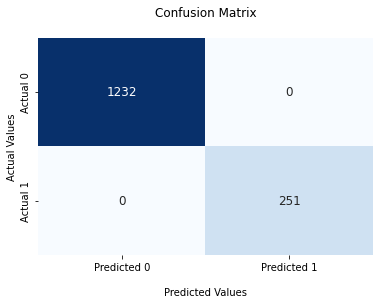

In [131]:
ax = sns.heatmap(cm_dt, annot=True, fmt='d', annot_kws={'fontsize': 12}, cmap='Blues',cbar=False)
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['Predicted 0','Predicted 1'])
ax.yaxis.set_ticklabels(['Actual 0', 'Actual 1'])

plt.show()

[Text(0.8611260863882899, 0.9782608695652174, 'DEBTINC <= 43.681\ngini = 0.281\nsamples = 1483\nvalue = [1232, 251]'),
 Text(0.7557096647716134, 0.9347826086956522, 'DELINQ <= 1.5\ngini = 0.227\nsamples = 1409\nvalue = [1225, 184]'),
 Text(0.626429458276155, 0.8913043478260869, 'DEROG <= 1.5\ngini = 0.189\nsamples = 1313\nvalue = [1174, 139]'),
 Text(0.4828791740181664, 0.8478260869565217, 'CLAGE <= 173.132\ngini = 0.169\nsamples = 1274\nvalue = [1155, 119]'),
 Text(0.27524014899039406, 0.8043478260869565, 'VALUE <= 84241.5\ngini = 0.249\nsamples = 612\nvalue = [523, 89]'),
 Text(0.16284388681957787, 0.7608695652173914, 'LOAN <= 16850.0\ngini = 0.345\nsamples = 257\nvalue = [200, 57]'),
 Text(0.09148532967392015, 0.717391304347826, 'VALUE <= 50823.0\ngini = 0.413\nsamples = 168\nvalue = [119, 49]'),
 Text(0.016728745997516826, 0.6739130434782609, 'CLAGE <= 69.725\ngini = 0.499\nsamples = 40\nvalue = [21, 19]'),
 Text(0.008364372998758413, 0.6304347826086957, 'gini = 0.0\nsamples = 10\n

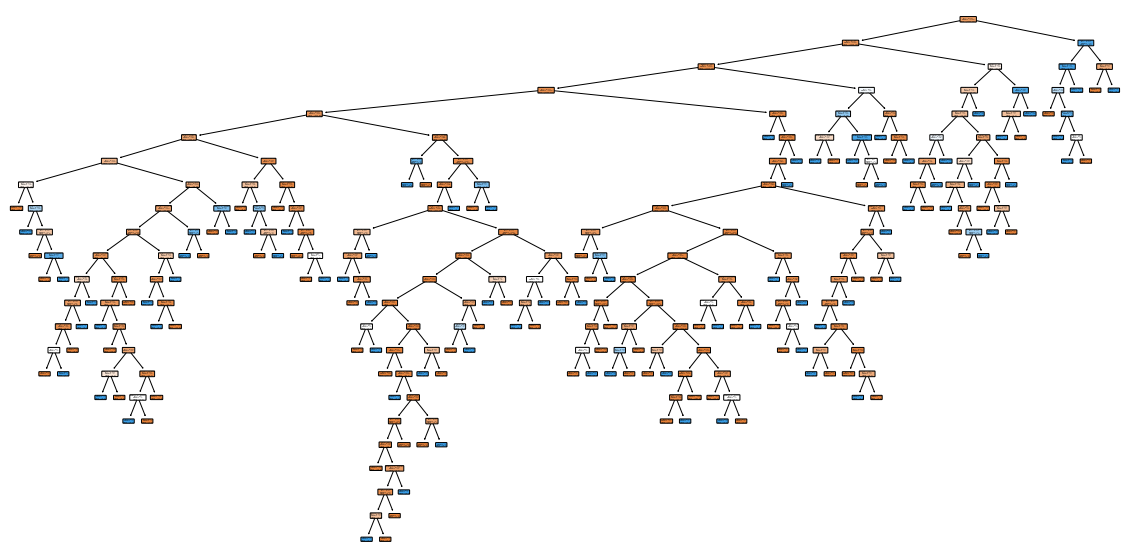

In [132]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(DTC_model,filled=True,rounded=True,feature_names = X.columns)

Se procede de igual manera con los datos de testeo.

In [133]:
y_pred_DTC_test = DTC_model.predict(X_test)

In [134]:
print(f'Accuracy - TEST: {accuracy_score(y_test,y_pred_DTC_test):.04}')
print(f'Precision - TEST: {precision_score(y_test,y_pred_DTC_test):.04}')
print(f'Recall - TEST: {recall_score(y_test,y_pred_DTC_test):.04}')
print(f'F1 - TEST: {f1_score(y_test,y_pred_DTC_test):.04}')
print('Matriz de confusión - TEST:')
cm_dt_test = confusion_matrix(y_test.ravel(),y_pred_DTC_test)
print(f'{cm_dt_test}')

Accuracy - TEST: 0.8949
Precision - TEST: 0.6727
Recall - TEST: 0.6379
F1 - TEST: 0.6549
Matriz de confusión - TEST:
[[295  18]
 [ 21  37]]


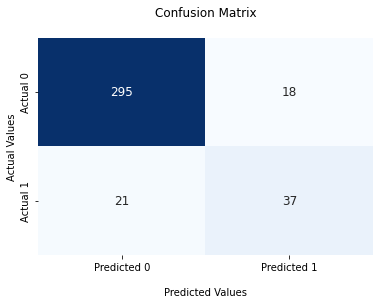

In [135]:
ax = sns.heatmap(cm_dt_test, annot=True, fmt='d', annot_kws={'fontsize': 12}, cmap='Blues',cbar=False)
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['Predicted 0','Predicted 1'])
ax.yaxis.set_ticklabels(['Actual 0', 'Actual 1'])

plt.show()

**Conclusión:** Si se dejan los hiperparámetros por defecto, se produce un sobreajuste de los datos. Esto se ve reflejado en el plot_tree del árbol y también en las métricas del conjunto de entrenamiento, las cuales son todas iguales a la unidad. 
Cuando se evalúa en el conjunto de testeo, se ve que dichas métricas empeoran considerablemente, lo que indica que el modelo sí sobreajusta los datos durante el entrenamiento. 

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### EJERCICIO 3.2

In [136]:
# Existe un feature y un valor de ese feature que reduce de manera máxima el gini. Ahí se realiza el corte
# El gini es una medida del grado de impureza del nodo.
# Lo mismo ocurre con la entropía: Una celda pura tiene entropía cero
criterion = ['gini', 'entropy']
max_depth = [2,3,4,5]
min_samples_leaf = [4,5,6,7,8]

hiperparametros = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
DTC_Grid = GridSearchCV(DTC_model,hiperparametros,refit=True,cv = 5,scoring = 'accuracy')
DTC_Grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [4, 5, 6, 7, 8]},
             scoring='accuracy')

In [137]:
DTC_Grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7}

In [138]:
max_accuracy2 = max(DTC_Grid.cv_results_['mean_test_score'])
accuracies2 = DTC_Grid.cv_results_['mean_test_score']
index = np.where(accuracies2 == max_accuracy2)
accuracy2_std = DTC_Grid.cv_results_['std_test_score'][index[0][0]]
print(f'La accuracy del mejor modelo es {max_accuracy2:.04} y su varianza es {(accuracy2_std)**2:.04}')

La accuracy del mejor modelo es 0.88 y su varianza es 0.0002241


In [139]:
# Se busca si hay mas de un modelo con dicho valor de accuracy
indexes2 = np.where(accuracies2 == max_accuracy2)
print(f'Existen {len(indexes2[0])} modelos con el máximo accuracy')

Existen 2 modelos con el máximo accuracy


In [140]:
modelo_DTC = DecisionTreeClassifier(random_state = 1234, criterion = 'gini',
                                    max_depth= 4, min_samples_leaf= 7)


cv_modelo_DTC_precision = cross_val_score(modelo_DTC,X_train,y_train,cv = 5, scoring = 'precision')
modelo_DTC_p_mean = cv_modelo_DTC_precision.mean()
modelo_DTC_p_std = cv_modelo_DTC_precision.std()

cv_modelo_DTC_recall = cross_val_score(modelo_DTC,X_train,y_train,cv = 5, scoring = 'recall')
modelo_DTC_r_mean = cv_modelo_DTC_recall.mean()
modelo_DTC_r_std = cv_modelo_DTC_recall.std()

cv_modelo_DTC_F1 = cross_val_score(modelo_DTC,X_train,y_train,cv = 5, scoring = 'f1')
modelo_DTC_F1_mean = cv_modelo_DTC_F1.mean()
modelo_DTC_F1_std = cv_modelo_DTC_F1.std()

modelo_DTC.fit(X_train,y_train)
y_pred_modelo_DTC_train = modelo_DTC.predict(X_train)
conf_matx_modelo_DTC_train = confusion_matrix(y_train.ravel(),y_pred_modelo_DTC_train)

In [141]:
print('Datos de entrenamiento')
print(f'Modelo: {DTC_Grid.best_params_}')
resumen = [[f'{max_accuracy2:.04}',f'{(accuracy2_std)**2:.04}',f'{modelo_DTC_p_mean:.04}',f'{(modelo_DTC_p_std)**2:.04}',
            f'{modelo_DTC_r_mean}',f'{(modelo_DTC_r_std)**2:.04}',f'{modelo_DTC_F1_mean:.04}',f'{(modelo_DTC_F1_std)**2:.04}',
            f'{conf_matx_modelo_DTC_train}']]
print(tabulate(resumen, headers = ['Acc_mean','Acc_var','Prec_mean','Prec_var','Rec_mean','Rec_var','F1_mean','F1_var','Conf_mtx']))

Datos de entrenamiento
Modelo: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7}
  Acc_mean    Acc_var    Prec_mean    Prec_var    Rec_mean    Rec_var    F1_mean    F1_var  Conf_mtx
----------  ---------  -----------  ----------  ----------  ---------  ---------  --------  -------------
      0.88  0.0002241       0.8226     0.01007    0.378196   0.004684     0.5133  0.005626  [[1218   14]
                                                                                             [ 143  108]]


[Text(0.65, 0.9, 'DEBTINC <= 43.681\ngini = 0.281\nsamples = 1483\nvalue = [1232, 251]'),
 Text(0.4, 0.7, 'DELINQ <= 1.5\ngini = 0.227\nsamples = 1409\nvalue = [1225, 184]'),
 Text(0.2, 0.5, 'DEROG <= 1.5\ngini = 0.189\nsamples = 1313\nvalue = [1174, 139]'),
 Text(0.1, 0.3, 'CLAGE <= 173.132\ngini = 0.169\nsamples = 1274\nvalue = [1155, 119]'),
 Text(0.05, 0.1, 'gini = 0.249\nsamples = 612\nvalue = [523, 89]'),
 Text(0.15, 0.1, 'gini = 0.087\nsamples = 662\nvalue = [632, 30]'),
 Text(0.3, 0.3, 'CLAGE <= 179.345\ngini = 0.5\nsamples = 39\nvalue = [19, 20]'),
 Text(0.25, 0.1, 'gini = 0.426\nsamples = 26\nvalue = [8, 18]'),
 Text(0.35, 0.1, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.6, 0.5, 'DELINQ <= 3.5\ngini = 0.498\nsamples = 96\nvalue = [51, 45]'),
 Text(0.5, 0.3, 'VALUE <= 126358.5\ngini = 0.463\nsamples = 77\nvalue = [49, 28]'),
 Text(0.45, 0.1, 'gini = 0.414\nsamples = 65\nvalue = [46, 19]'),
 Text(0.55, 0.1, 'gini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.7, 0.

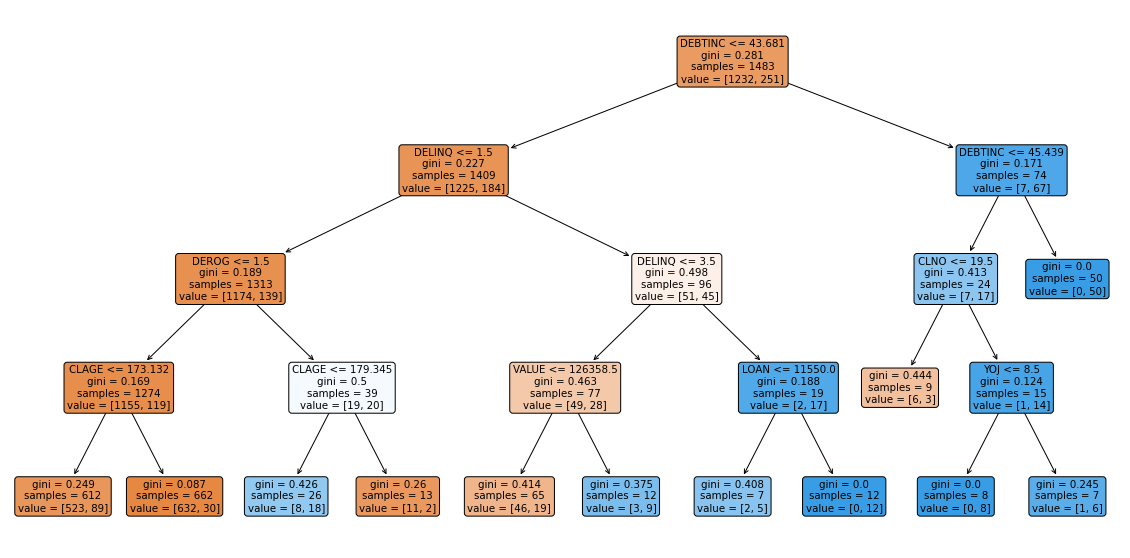

In [142]:
plt.figure(figsize=(20,10))
plot_tree(modelo_DTC,filled=True,rounded=True,feature_names = X.columns)

In [143]:
cv_modelo_DTC_accuracy_test = cross_val_score(modelo_DTC,X_test,y_test,cv = 5, scoring = 'accuracy')
modelo_DTC_a_mean_test = cv_modelo_DTC_accuracy_test.mean()
modelo_DTC_a_std_test = cv_modelo_DTC_accuracy_test.std()

cv_modelo_DTC_precision_test = cross_val_score(modelo_DTC,X_test,y_test,cv = 5, scoring = 'precision')
modelo_DTC_p_mean_test = cv_modelo_DTC_precision_test.mean()
modelo_DTC_p_std_test = cv_modelo_DTC_precision_test.std()

cv_modelo_DTC_recall_test = cross_val_score(modelo_DTC,X_test,y_test,cv = 5, scoring = 'recall')
modelo_DTC_r_mean_test = cv_modelo_DTC_recall_test.mean()
modelo_DTC_r_std_test = cv_modelo_DTC_recall_test.std()

cv_modelo_DTC_F1_test = cross_val_score(modelo_DTC,X_test,y_test,cv = 5, scoring = 'f1')
modelo_DTC_F1_mean_test = cv_modelo_DTC_F1_test.mean()
modelo_DTC_F1_std_test = cv_modelo_DTC_F1_test.std()

modelo_DTC.fit(X_test,y_test)
y_pred_modelo_DTC_test = modelo_DTC.predict(X_test)
conf_matx_modelo_DTC_test = confusion_matrix(y_test.ravel(),y_pred_modelo_DTC_test)

In [144]:
print('Datos de testeo')
print(f'Modelo: {DTC_Grid.best_params_}')
resumen = [[f'{modelo_DTC_a_mean_test:.04}',f'{(modelo_DTC_a_std_test)**2:.04}',f'{modelo_DTC_p_mean_test:.04}',f'{(modelo_DTC_p_std_test)**2:.04}',
            f'{modelo_DTC_r_mean_test}',f'{(modelo_DTC_r_std_test)**2:.04}',f'{modelo_DTC_F1_mean_test:.04}',f'{(modelo_DTC_F1_std_test)**2:.04}',
            f'{conf_matx_modelo_DTC_test}']]
print(tabulate(resumen, headers = ['Acc_mean','Acc_var','Prec_mean','Prec_var','Rec_mean','Rec_var','F1_mean','F1_var','Conf_mtx']))

Datos de testeo
Modelo: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7}
  Acc_mean    Acc_var    Prec_mean    Prec_var    Rec_mean    Rec_var    F1_mean    F1_var  Conf_mtx
----------  ---------  -----------  ----------  ----------  ---------  ---------  --------  -----------
     0.841  0.0006723       0.4961     0.01204    0.365152   0.009031     0.4153  0.008279  [[303  10]
                                                                                             [ 27  31]]


**Conclusión**

El ajuste de hiperparámetros evita el sobreajuste del modelo, lo que se ve claramente al comparar las métricas en el conjunto de entrenamiento de los modelos del EJERCICIO 3.1 y EJERCICIO 3.2.

Por otro lado, comparando las métricas de los modelos del EJERCICIO 2.2 y 3.2, se concluye que el DTClassifier es el mejor modelo. Si bien los valores de accuracy de ambos son muy similares (87.12% para el SGDClassifier y 88% para el DTClassifier), otras métricas como el Recall y el F1 son un 5% superiores en el caso del DTClassifier. 

In [145]:
print('Datos de entrenamiento')
print(f'Modelo: {hiperparam_modelo_1}')
resumen = [[f'{max_accuracy:.04}',f'{(std_accuracy_modelo1)**2:.04}',f'{modelo1_p_mean:.04}',f'{(modelo1_p_std)**2:.04}',
            f'{modelo1_r_mean}',f'{(modelo1_r_std)**2:.04}',f'{modelo1_F1_mean:.04}',f'{(modelo1_F1_std)**2:.04}',f'{conf_matx_modelo1_train}']]
print(tabulate(resumen, headers = ['Acc_mean','Acc_var','Prec_mean','Prec_var','Rec_mean','Rec_var','F1_mean','F1_var','Conf_mtx']))

print('Datos de entrenamiento')
print(f'Modelo: {DTC_Grid.best_params_}')
resumen = [[f'{max_accuracy2:.04}',f'{(accuracy2_std)**2:.04}',f'{modelo_DTC_p_mean:.04}',f'{(modelo_DTC_p_std)**2:.04}',
            f'{modelo_DTC_r_mean}',f'{(modelo_DTC_r_std)**2:.04}',f'{modelo_DTC_F1_mean:.04}',f'{(modelo_DTC_F1_std)**2:.04}',
            f'{conf_matx_modelo_DTC_train}']]
print(tabulate(resumen, headers = ['Acc_mean','Acc_var','Prec_mean','Prec_var','Rec_mean','Rec_var','F1_mean','F1_var','Conf_mtx']))

Datos de entrenamiento
Modelo: {'SGD_class__alpha': 0.005, 'SGD_class__eta0': 1e-06, 'SGD_class__learning_rate': 'optimal', 'SGD_class__loss': 'log'}
  Acc_mean    Acc_var    Prec_mean    Prec_var    Rec_mean    Rec_var    F1_mean    F1_var  Conf_mtx
----------  ---------  -----------  ----------  ----------  ---------  ---------  --------  -------------
    0.8712  0.0001282       0.7903    0.007218    0.326745   0.001402     0.4617  0.002406  [[1215   17]
                                                                                             [ 175   76]]
Datos de entrenamiento
Modelo: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7}
  Acc_mean    Acc_var    Prec_mean    Prec_var    Rec_mean    Rec_var    F1_mean    F1_var  Conf_mtx
----------  ---------  -----------  ----------  ----------  ---------  ---------  --------  -------------
      0.88  0.0002241       0.8226     0.01007    0.378196   0.004684     0.5133  0.005626  [[1218   14]
                            